In [9]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [10]:
data_paths = [
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/018_Daphnet_id_1_HumanActivity_tr_9693_1st_20732.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/115_PSM_id_1_Facility_tr_50000_1st_129872.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/137_CreditCard_id_1_Finance_tr_500_1st_541.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/173_GECCO_id_1_Sensor_tr_16165_1st_16265.csv',
]

In [11]:
def plot_mts(data_path):
    df = pd.read_csv(data_path)

    window_size = 10000
    length = df.shape[0]
    if length > 10000:
        anomaly_start_idx = data_path.split('.')[0].split('_')[-1]
        start_idx = int(anomaly_start_idx) - window_size // 2
        end_idx = start_idx + window_size
        if start_idx < 0:
            start_idx = 0
            end_idx = window_size
        elif end_idx > length:
            end_idx = length
            start_idx = end_idx - window_size

    data = df.iloc[start_idx: end_idx, :-1].values
    label = df.iloc[start_idx: end_idx, -1].values

    num_cols = 2
    num_rows = (data.shape[1] + num_cols - 1) // num_cols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]

    for i in range(data.shape[1]):
        axes[i].plot(data[:, i], label=f'Sensor {i+1}')
        axes[i].set_title(f'Sensor {i+1}')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Value')
        #axes[i].legend()
        axes[i].grid()

    
        for t in range(len(label)):
            if label[t] == 1:
                axes[i].axvspan(t - 0.5, t + 0.5, color='red', alpha=0.2)

    # turn off unused subplots
    for j in range(data.shape[1], len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv


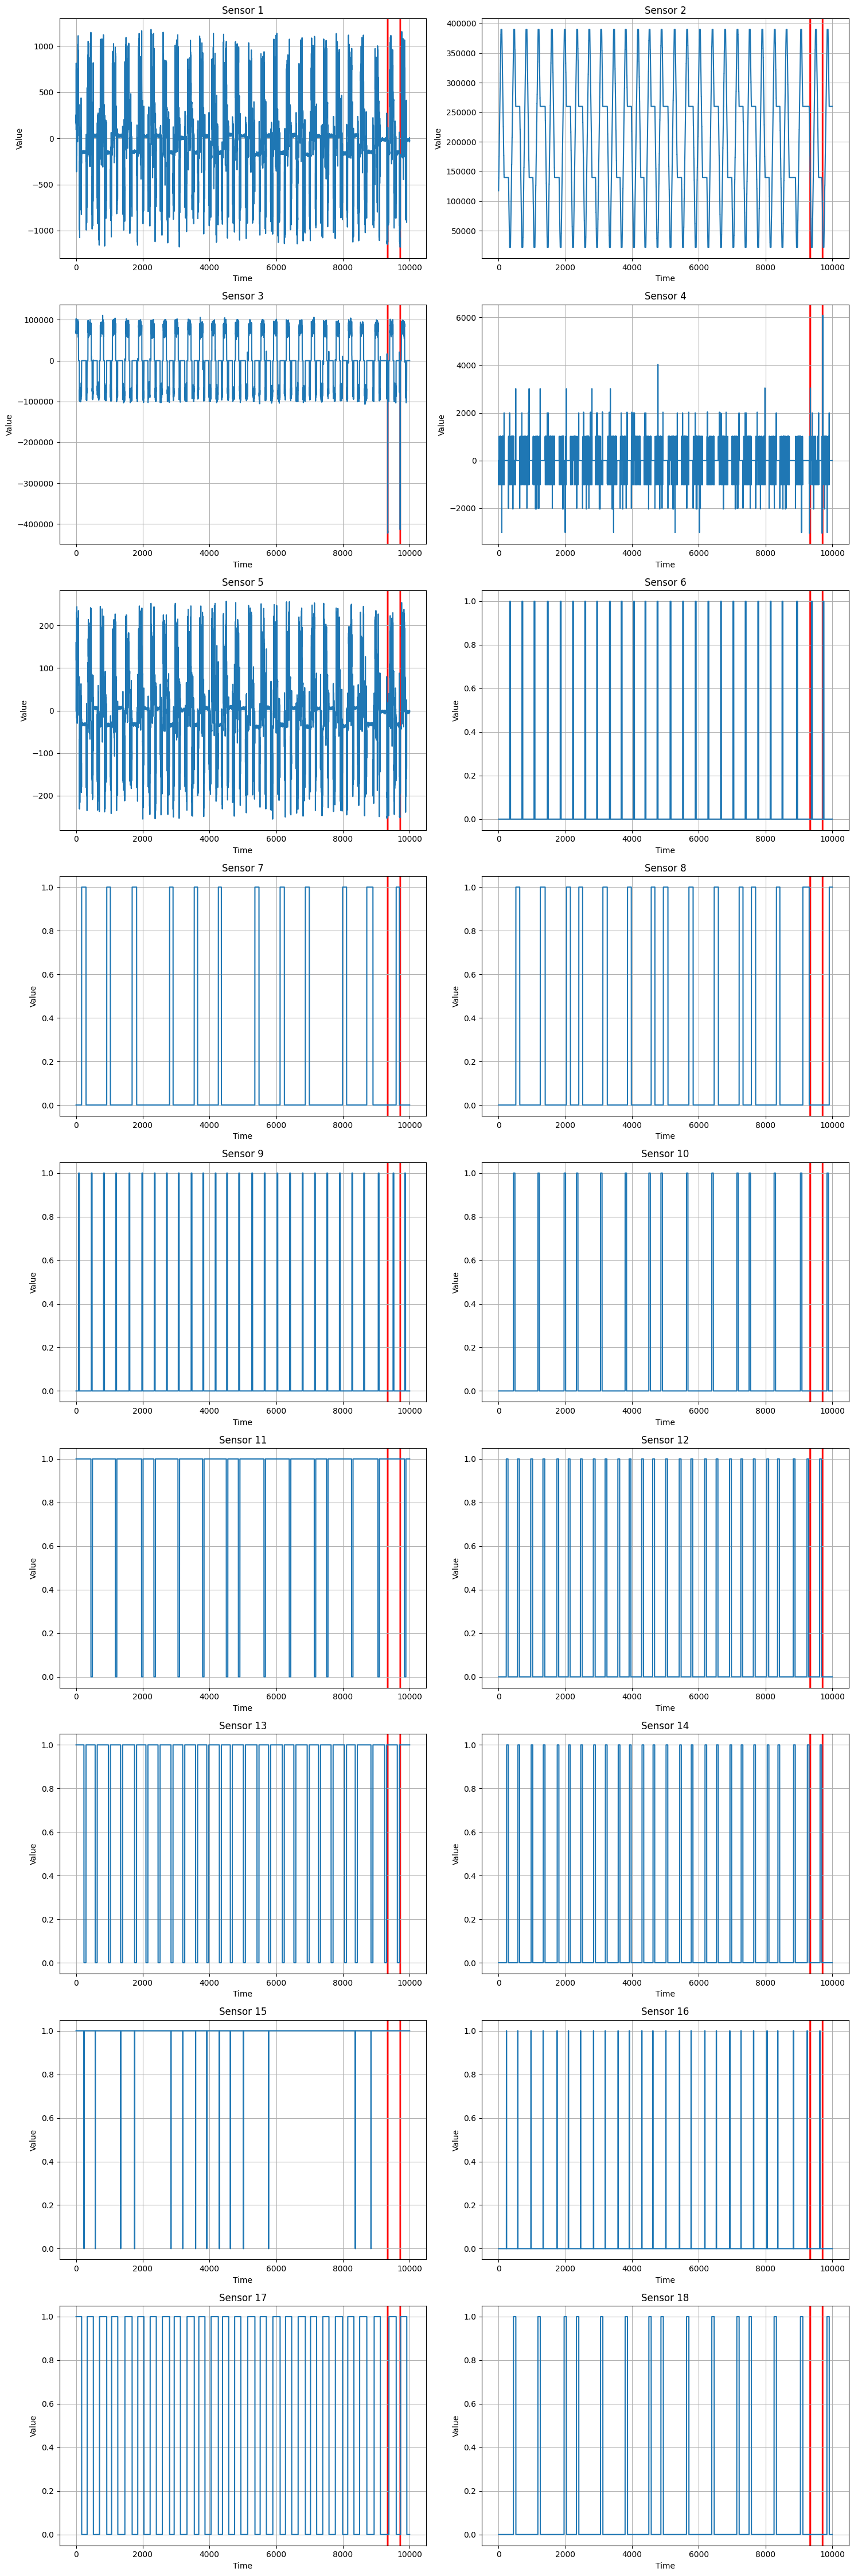

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/018_Daphnet_id_1_HumanActivity_tr_9693_1st_20732.csv


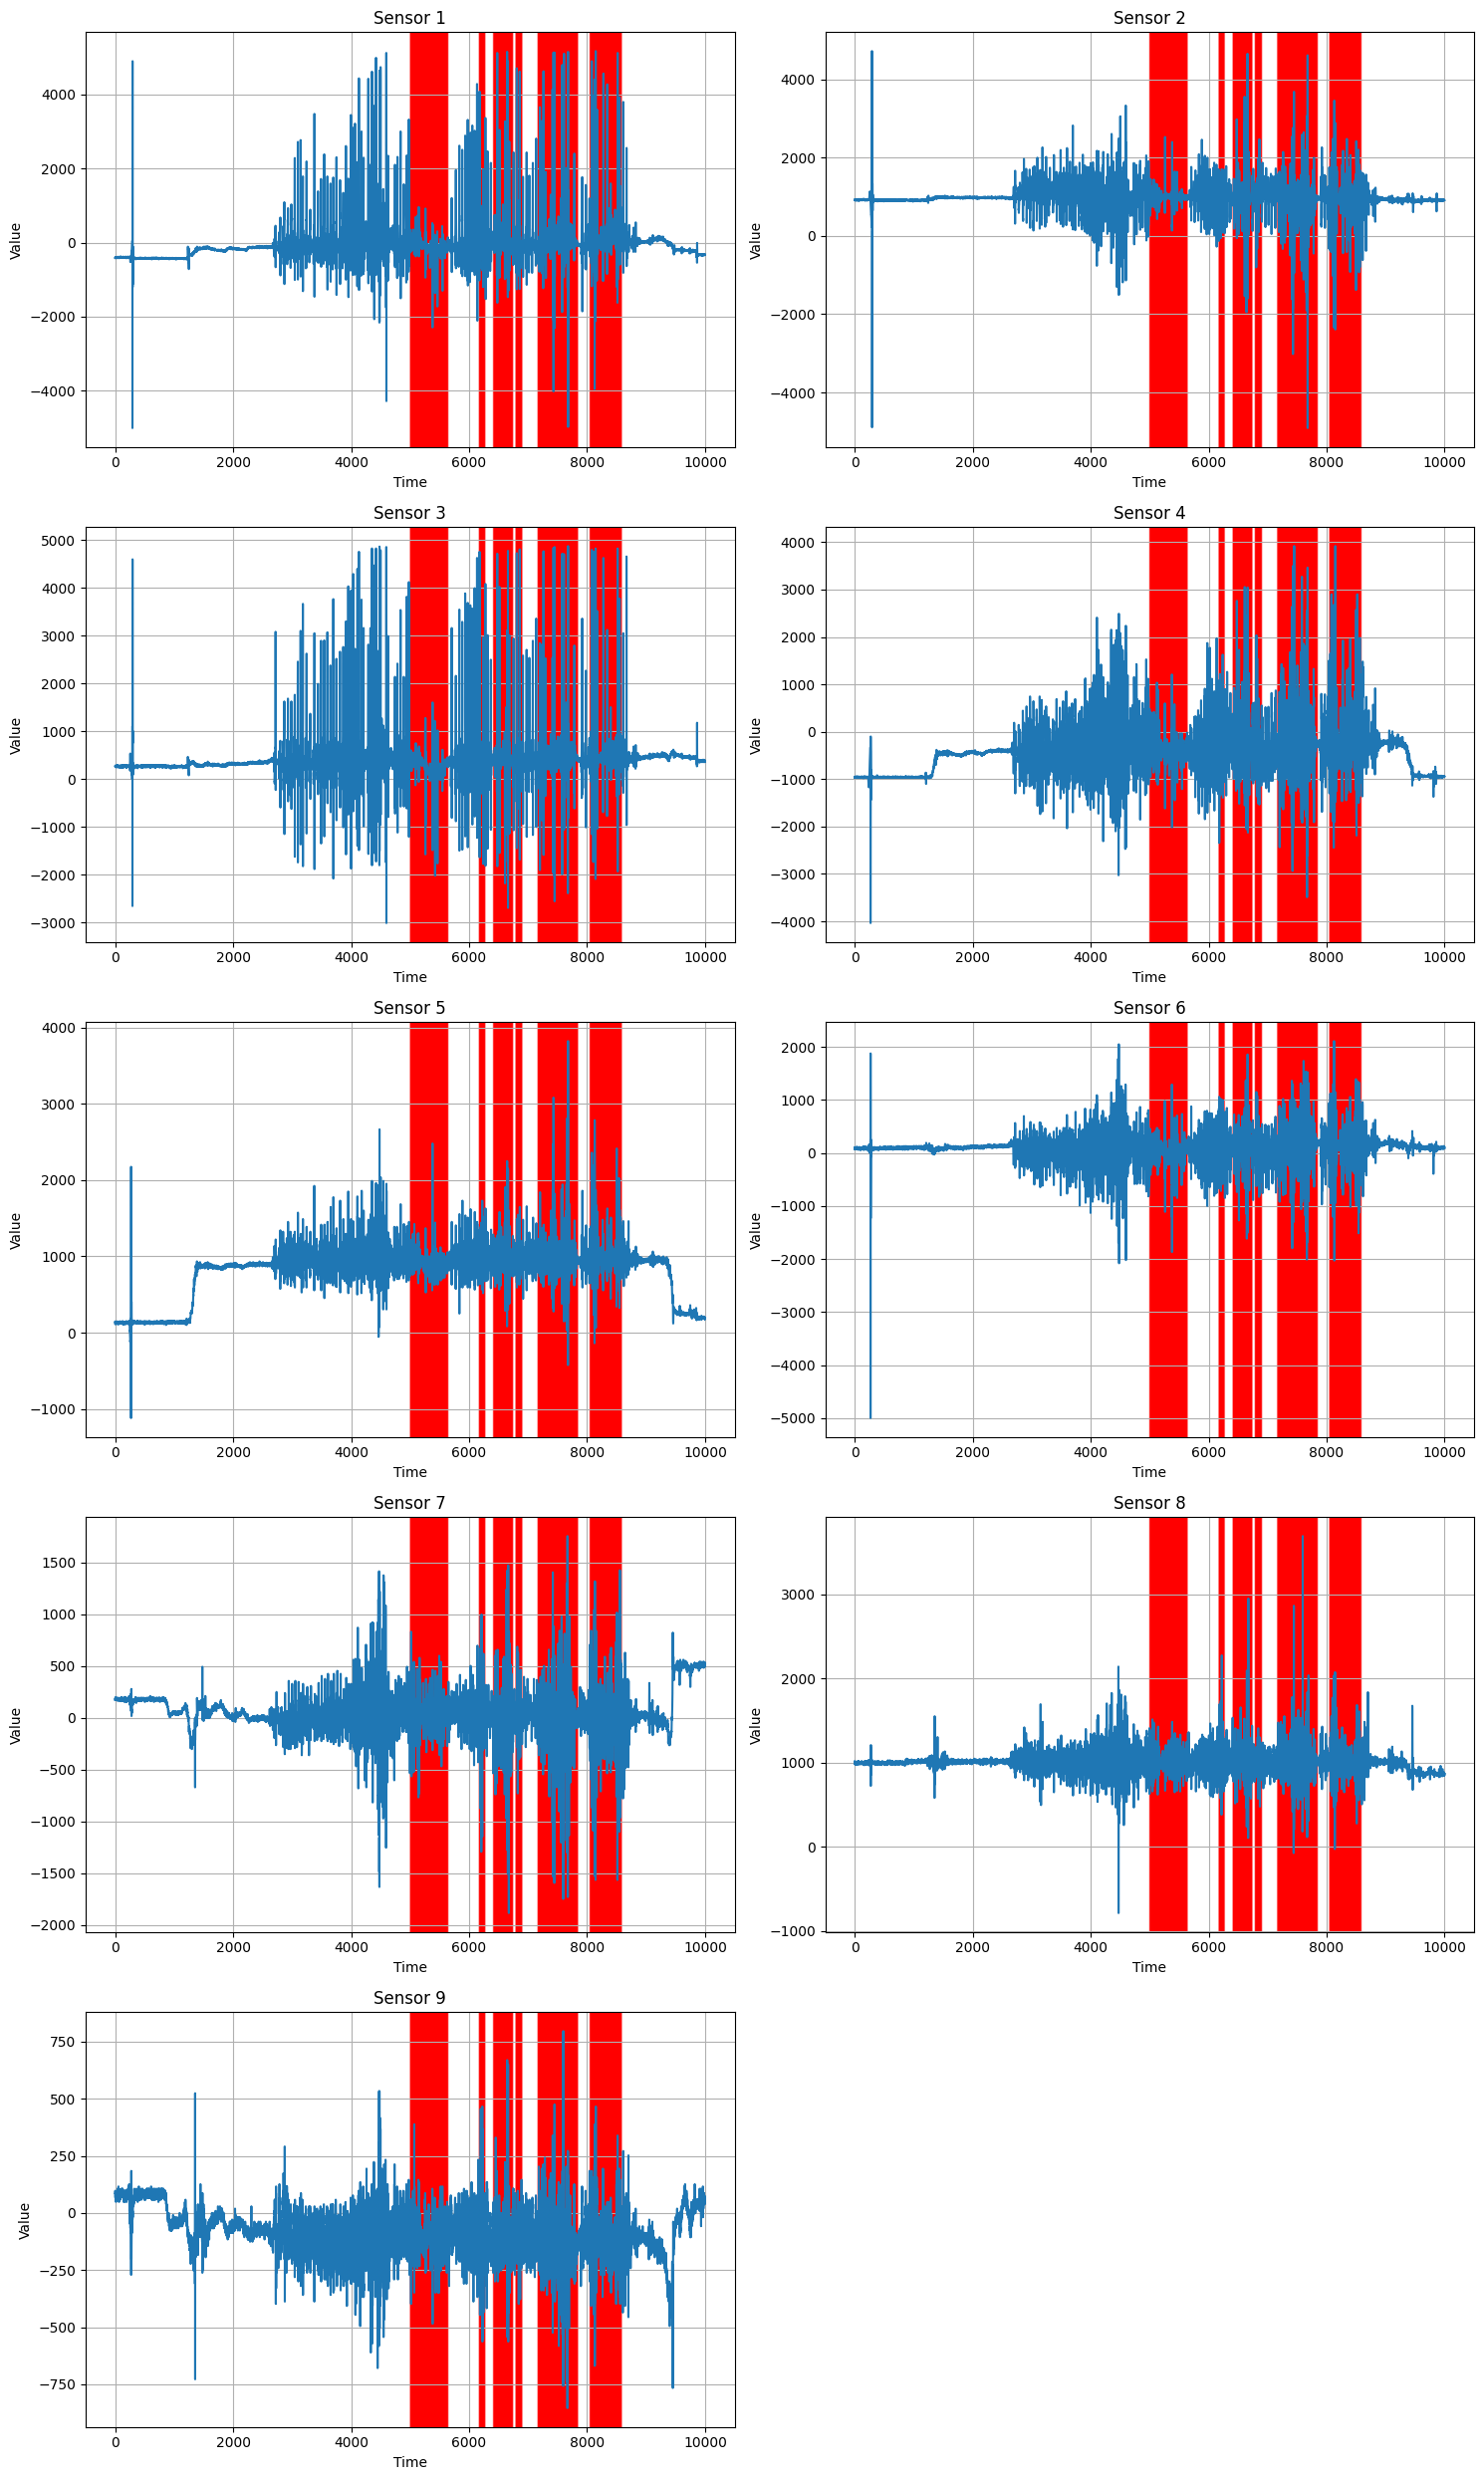

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/115_PSM_id_1_Facility_tr_50000_1st_129872.csv


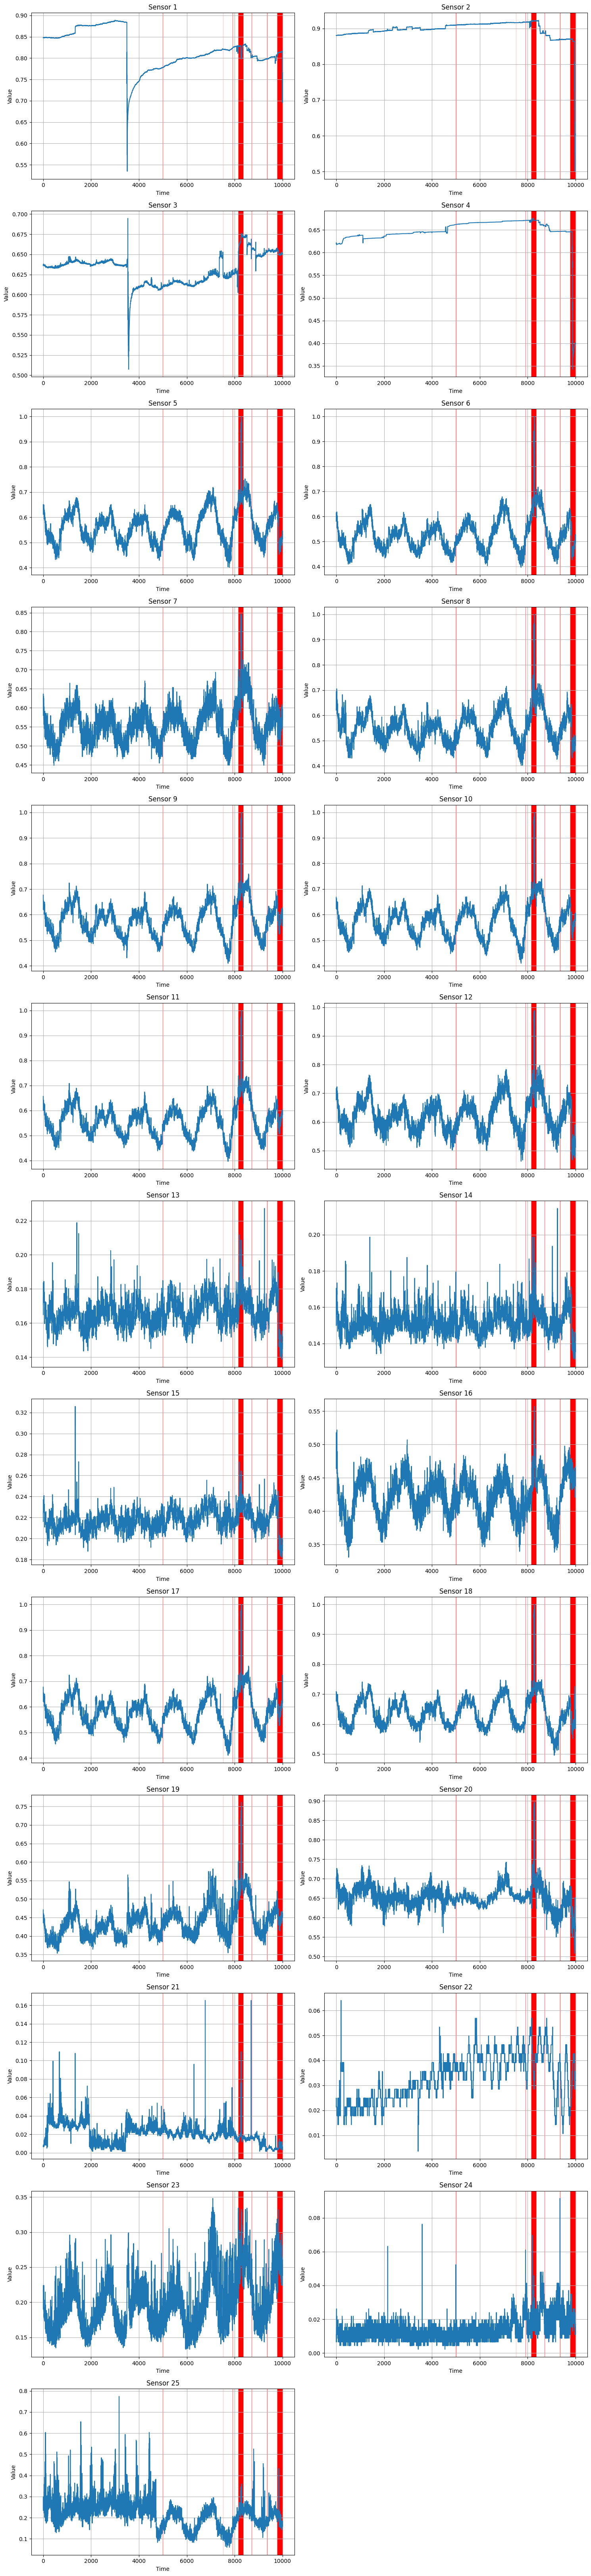

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/137_CreditCard_id_1_Finance_tr_500_1st_541.csv


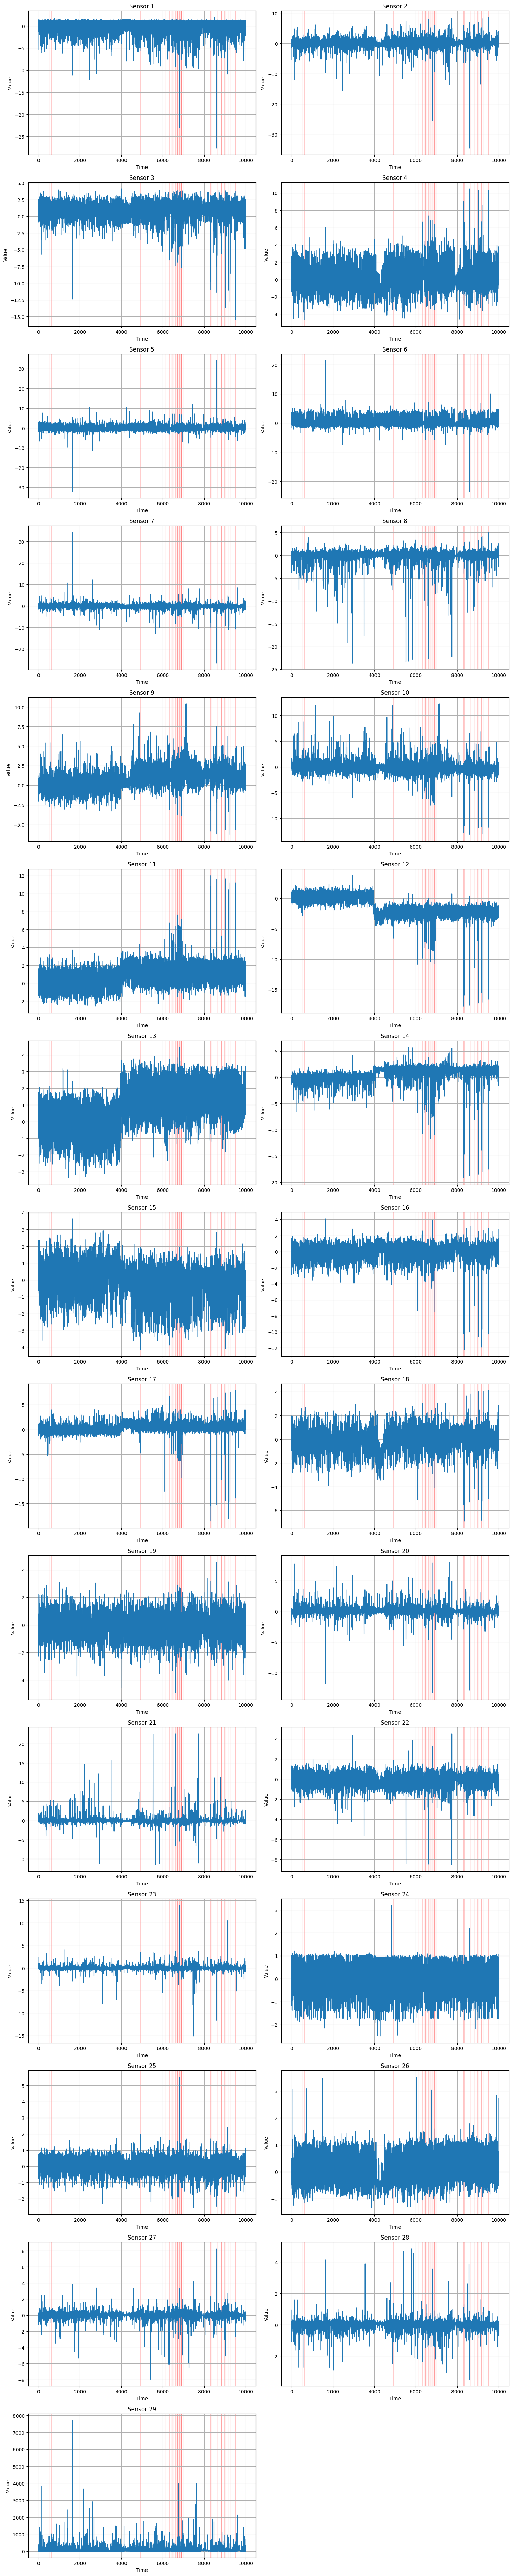

Plotting data from: /home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/173_GECCO_id_1_Sensor_tr_16165_1st_16265.csv


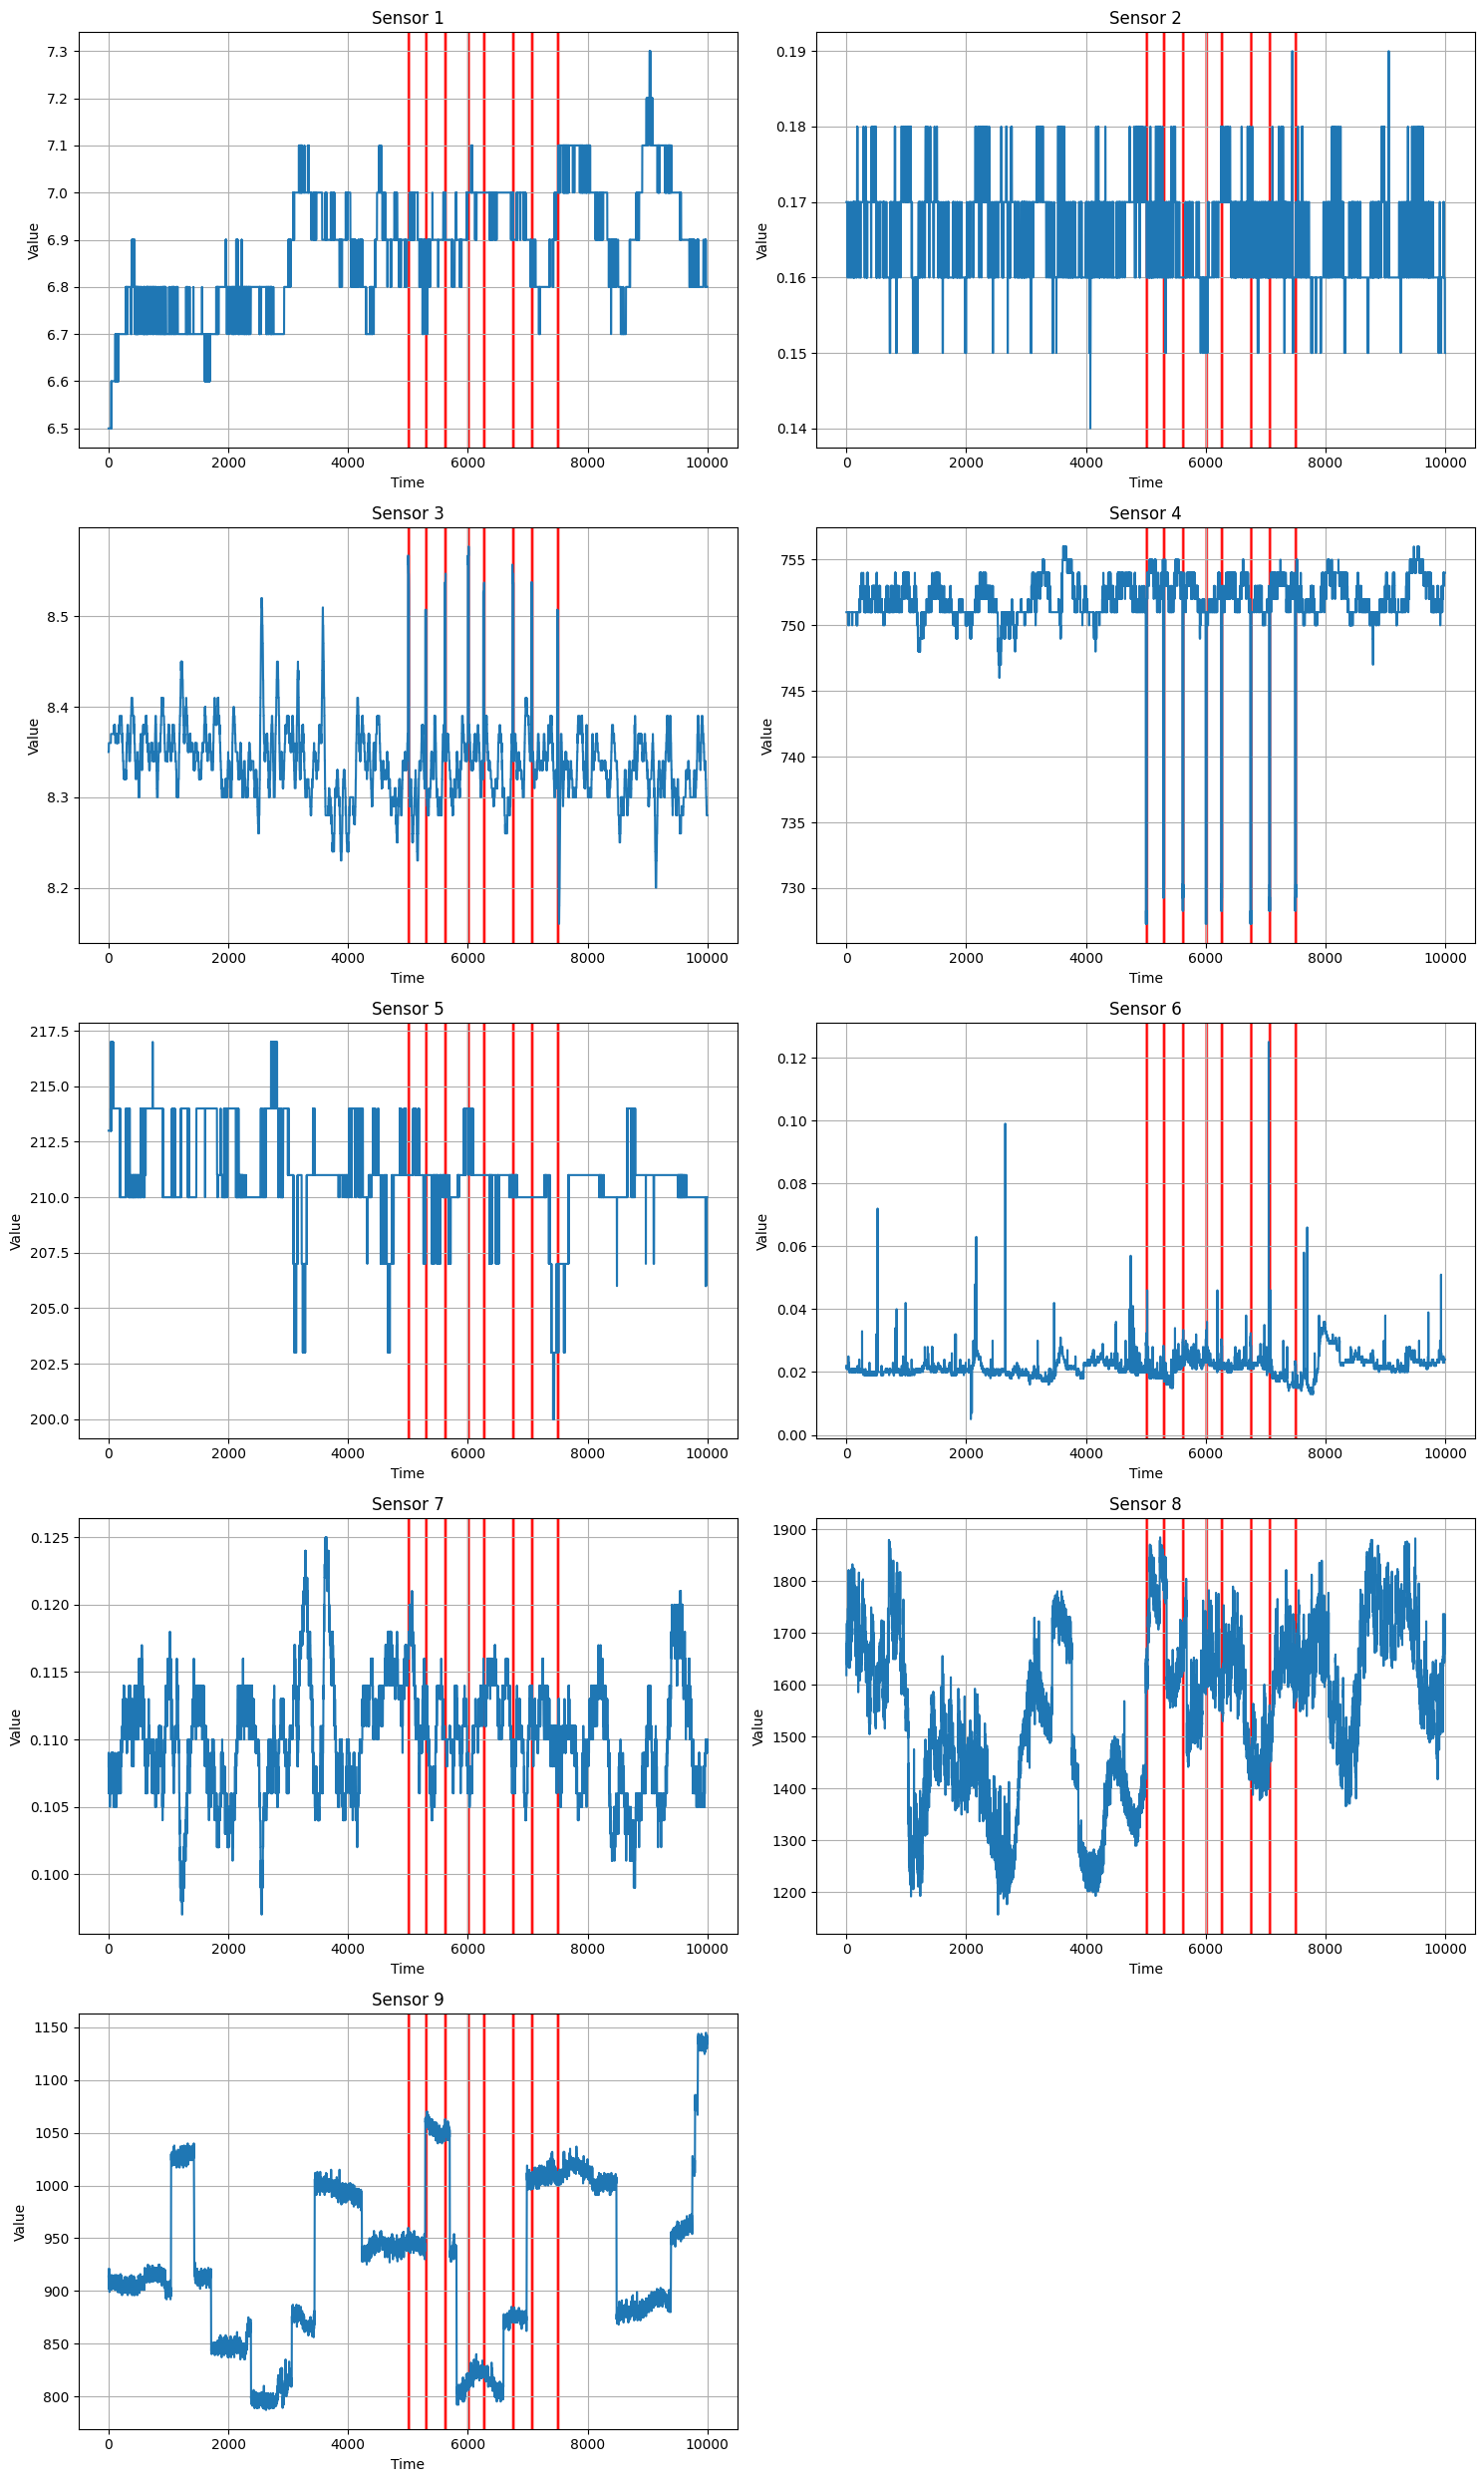

In [12]:
for data_path in data_paths:
    if os.path.exists(data_path):
        print(f"Plotting data from: {data_path}")
        plot_mts(data_path)
    else:
        print(f"Data file not found: {data_path}")